import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import urllib.request
import tarfile
from tensorflow.keras import layers,datasets,models 

In [2]:
#下载
url='https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'
filepath='c:/users/yanhe/.keras/datasets/cifar-100-python.tar.gz'
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)
else:
    print('data file already exist')
#解压
if not os.path.exists("c:/users/yanhe/.keras/datasets/cifar-100-batches-py"):
    tfile=tarfile.open("c:/users/yanhe/.keras/datasets/cifar-100-python.tar.gz",'r:gz')
    result=tfile.extractall('c:/users/yanhe/.keras/datasets')
    print('Extracted to c:/users/yanhe/.keras/datasets/cifar-100-batches-py')
else:
    print('Directory already exists.')


data file already exist
Extracted to c:/users/yanhe/.keras/datasets/cifar-100-batches-py


In [4]:
#载入数据
(train_x,train_y),(test_x,test_y)=datasets.cifar100.load_data()


In [5]:
#显示数据集信息
print('training data shape:',train_x.shape)
print('training labels shape:',train_y.shape)
print('test data shape:',test_x.shape)
print('test label shape:',test_y.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


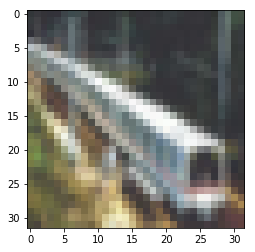

In [6]:
#查看单项image和label
#查看Xtrain第7张image
plt.imshow(train_x[6])

In [7]:
#查看label
#对应类别信息可查看：https://www.cs.toronto.edu/~kriz/cifar.html
train_y[6]


array([90])

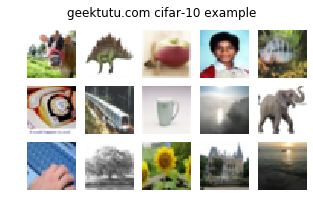

In [8]:
plt.figure(figsize=(5,3))
plt.subplots_adjust(hspace=0.1)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_x[i])
    plt.axis('off')
_ = plt.suptitle("geektutu.com cifar-10 example")

In [9]:
#数据预处理
#查看图像信息，显示第一个图像的第一个像素点
train_x[0][0][0]

array([255, 255, 255], dtype=uint8)

In [10]:
#将图像进行数字标准化
train_x,test_x=train_x/255.0,test_x/255.0
#查看预处理后的图像数据信息
train_x[0][0][0]

array([1., 1., 1.])

In [11]:
#查看标签数据
train_y[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

In [12]:
train_y.shape

(50000, 1)

In [13]:
model = tf.keras.models.Sequential()
 
# unit 1
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))

# unit 2
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))

# unit 3
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))

# unit 4
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))

# unit 5
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))

 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='softmax'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history=model.fit(train_x,train_y,epochs=5)

Epoch 1/5
50000/50000 [==============================] - 1438s 29ms/sample - loss: 4.6060 - acc: 0.0086
Epoch 2/5
50000/50000 [==============================] - 1427s 29ms/sample - loss: 4.6060 - acc: 0.0093
Epoch 3/5
50000/50000 [==============================] - 1388s 28ms/sample - loss: 4.6059 - acc: 0.0085
Epoch 4/5
50000/50000 [==============================] - 2029s 41ms/sample - loss: 4.6060 - acc: 0.0084
Epoch 5/5
50000/50000 [==============================] - 1580s 32ms/sample - loss: 4.6059 - acc: 0.0086


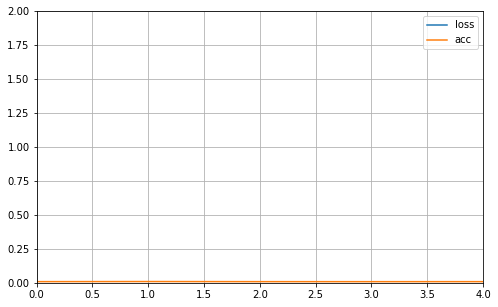

In [17]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
    
plot_learning_curves(history)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
    
plot_learning_curves(history)

In [16]:
model.evaluate(test_x,test_y)

10000/10000 [==============================] - 40s 4ms/sample - loss: 4.6052 - acc: 0.0100


[4.605196203613281, 0.01]